## Required Package/Libraries

In [1]:
pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from pandas import DataFrame
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
import re
import requests  ## for getting data from a server GET
import graphviz
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook() 
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)     

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [75]:
sentiment_labels = ["neg","pos"]

In [6]:
raw_data = pd.read_csv("../content/drive/MyDrive/exam2/moviereviewDATA_Sentiment_LabelAtEND.csv", error_bad_lines=True)

In [7]:
raw_data

,text,reviewclass,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177
0,'plot : two teen couples go to a church party,drink and then drive . \nthey get into an acc...,but his girlfriend continues to see him in he...,and has nightmares . \nwhat\'s the deal ? \nw...,but presents it in a very bad package . \nwhi...,since i generally applaud films which attempt...,mess with your head and such ( lost highway &...,but there are good and bad ways of making all...,and these folks just didn\'t snag this one co...,but executed it terribly . \nso what are the ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'the happy bastard\'s quick movie review \ndam...,virus still feels very empty,like a movie going for all flash and no subst...,we don\'t know the origin of what took over t...,and,of course,we don\'t know why donald sutherland is stumb...,"it\'s just \"" hey",let\'s chase these people around with some ro...,even from the likes of curtis . \nyou\'re mor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'it is movies like these that make a jaded mov...,the mod squad tells the tale of three reforme...,things go wrong as evidence gets stolen and t...,the ads make it seem like so much more . \nqu...,cool music,claire dane\'s nice hair and cute outfits,car chases,stuff blowing up,and the like . \nsounds like a cool movie,does it not ? \nafter the first fifteen minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"' \"" quest for camelot \"" is warner bros . \' ...",fully-animated attempt to steal clout from di...,but the mouse has no reason to be worried . \...,if flawed,"20th century fox production \"" anastasia","\"" but disney\'s \"" hercules","\"" with its lively cast and colorful palate",had her beat hands-down when it came time to ...,it\'s no contest,"as \"" quest for camelot \"" is pretty much dea...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'synopsis : a mentally unstable man undergoing...,a fledgling restauranteur . \nunsuccessfully ...,he takes pictures of her and kills a number o...,both theatrical and direct-to-video . \ntheir...,no big name stars ) and serve as vehicles to ...,he\'s rejected rather quickly ( the psycho ty...,ex-wife,or ex-husband ) . \nother than that,stalked is just another redundant entry doome...,though that is what it sets out to do . \nint...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,'wow ! what a movie . \nit\'s everything a mov...,dramatic,interesting,weird,funny,weird and strikingly original . \nyep that pr...,funniest most original movies i have ever see...,being john malkovich may as well be one of th...,that one cannot pick an all time favorite . \...,in search of a job . \nhis wife lotte schwart...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,'richard gere can be a commanding actor,but he\'s not always in great films . \nevery...,aaron ( edward norton ),is a shy stuttering tennessee boy who is accu...,believes that he is actually innocent and set...,he becomes involved with aaron and is determi...,but just once,i wanted to see him kick back and come out of...,you don\'t see very far inside . \nnorton\'s ...,the cinematography is crisp and rich . \nthe ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,'glory--starring matthew broderick,denzel washington,and morgan freeman--is the true story of the ...,the first black fighting unit recruited by th...,the young white officer who led the black sol...,the son of well-to-do abolitionists,hailed from boston high society . \nthe lette...,and were,evidently,the inspiration for glory . \nas the film beg...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,'steven spielberg\'s second epic film on world...,ever the student on film,has managed to resurrect the war genre by pro...,and most

In [ ]:
raw_data.iloc[0]

In [ ]:
data= pd.DataFrame(columns=['Text'])
for i in range(raw_data.shape[0]): #iterate over rows
    sentence = ""
    for j in range(raw_data.shape[1]): #iterate over columns
        if str(raw_data.iloc[i,j]) == 'nan' or str(raw_data.iloc[i,j]) == 'NaN':
            break
        sentence = sentence +", "+ str(raw_data.iloc[i, j]) #get cell value
    data.loc[len(data.index)]=sentence
data

In [ ]:
print(data.iloc[1,0])

In [ ]:
for i in range(data.shape[0]):
    data.loc[i,"Reviewclass"]=data.iloc[i,0][-3:]
    data.iloc[i,0]=data.iloc[i,0][3:-6]
    data.iloc[i,0]=data.iloc[i,0].replace("\\n","")
    data.iloc[i,0]=data.iloc[i,0].replace('\\', "")
    data.iloc[i,0]=data.iloc[i,0].replace('\"', "")

In [ ]:
data

In [ ]:
print(data.iloc[1,0])

In [ ]:
data.to_csv("../content/drive/MyDrive/exam2/cleaned_raw_data.csv", index=False)

##Part 2: Data Cleaning

In [9]:
processed_data = pd.read_csv("../content/drive/MyDrive/exam2/cleaned_raw_data.csv")

###“Before cleaning” data frame


In [10]:
processed_data

,Text,Reviewclass
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review damn th...,neg
2,it is movies like these that make a jaded movi...,neg
3,quest for camelot is warner bros . ' first ...,neg
4,synopsis : a mentally unstable man undergoing ...,neg
...,...,...
1995,wow ! what a movie . it's everything a movie c...,pos
1996,"richard gere can be a commanding actor , but ...",pos
1997,"glory--starring matthew broderick , denzel wa...",pos
1998,steven spielberg's second epic film on world w...,pos


In [11]:
# Drop any rows with missing data
processed_data.dropna(inplace=True)

### Word cloud for “neg” and “pos” data before cleaning

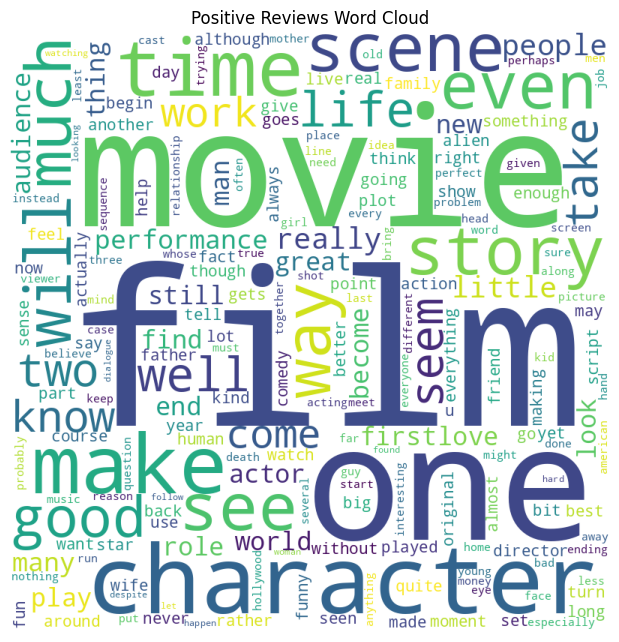

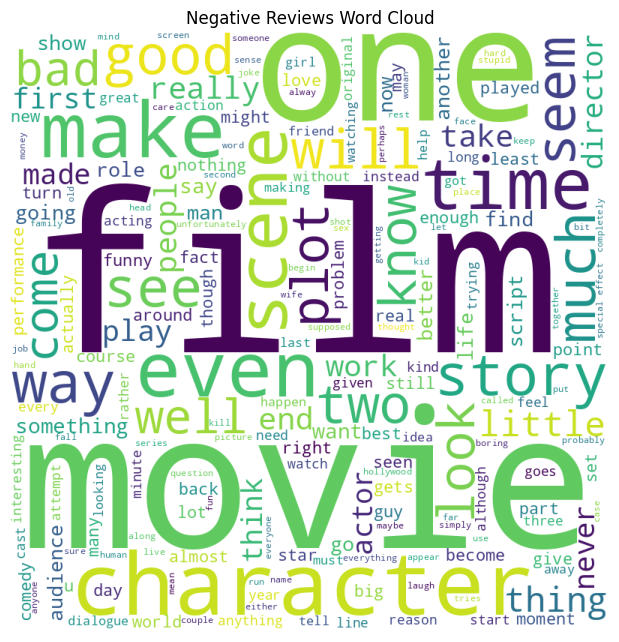

In [12]:
# Split data into separate DataFrames based on sentiment
pos_df = processed_data[processed_data['Reviewclass'] == 'pos']
neg_df = processed_data[processed_data['Reviewclass'] == 'neg']

# Create word clouds for the positive and negative reviews
pos_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(pos_df['Text'].tolist()))
neg_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(neg_df['Text'].tolist()))

# Display the word clouds for positive and negative reviews
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

In [13]:
# Remove any non-alphabetic characters and convert all text to lowercase
processed_data['Text'] = processed_data['Text'].str.replace('[^a-zA-Z\s]', '').str.lower()
# Remove stop words from reviews
stopwords = set(STOPWORDS)
stopwords.add("movie")
stopwords.add("film")
processed_data['Text'] = processed_data['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))

pattern = r'\b[a-zA-Z]{4,14}\b'
cleaned_df = processed_data.copy()
# Apply the pattern to the text column and create a new column with the cleaned text
cleaned_df['Text'] = processed_data['Text'].apply(lambda x: ' '.join(re.findall(pattern, x)))


###“After cleaning” data frame

In [16]:
cleaned_df

,Text,Reviewclass
0,plot teen couples church party drink drive acc...,neg
1,happy bastard quick review damn head start sta...,neg
2,movies make jaded viewer thankful invention ti...,neg
3,quest camelot warner bros first feature length...,neg
4,synopsis mentally unstable undergoing psychoth...,neg
...,...,...
1995,everything funny dramatic interesting weird fu...,pos
1996,richard gere commanding actor always great fil...,pos
1997,glory starring matthew broderick denzel washin...,pos
1998,steven spielberg second epic world unquestione...,pos


In [14]:
cleaned_df.to_csv("../content/drive/MyDrive/exam2/CleanDF_PoonamParagThakur.csv", index=False)

In [6]:
cleaned_df = pd.read_csv("../content/drive/MyDrive/exam2/CleanDF_PoonamParagThakur.csv")

labels_DF = DataFrame(list(cleaned_df['Reviewclass']),columns=['Reviewclass'])

# CountVectorizer
cv = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{4,}\b',max_features=50)
cv_df = pd.DataFrame(cv.fit_transform(cleaned_df['Text']).toarray(), columns=cv.get_feature_names_out())

cv_dfs = [labels_DF, cv_df]
labeled_cleaned_df = pd.concat(cv_dfs,axis=1, join='inner')
labeled_cleaned_df

,Reviewclass,action,actually,audience,best,better,cast,character,characters,come,...,star,story,thing,things,think,time,work,world,year,years
0,neg,0,2,2,0,0,0,2,1,0,...,0,0,0,2,0,0,0,2,0,1
1,neg,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,0,0
2,neg,0,0,3,1,0,1,0,3,0,...,0,0,1,1,0,1,0,0,0,0
3,neg,0,0,0,1,0,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0
4,neg,0,1,2,0,0,1,1,0,0,...,1,3,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,pos,0,0,0,6,0,1,0,0,1,...,0,0,1,0,1,4,0,1,3,0
1996,pos,0,1,0,0,0,1,0,0,1,...,0,2,0,0,0,1,1,0,0,0
1997,pos,3,0,0,0,0,1,1,0,0,...,0,2,0,0,0,2,0,0,0,0
1998,pos,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,1,2,1,0


###Word cloud for “neg” and “pos” data after cleaning

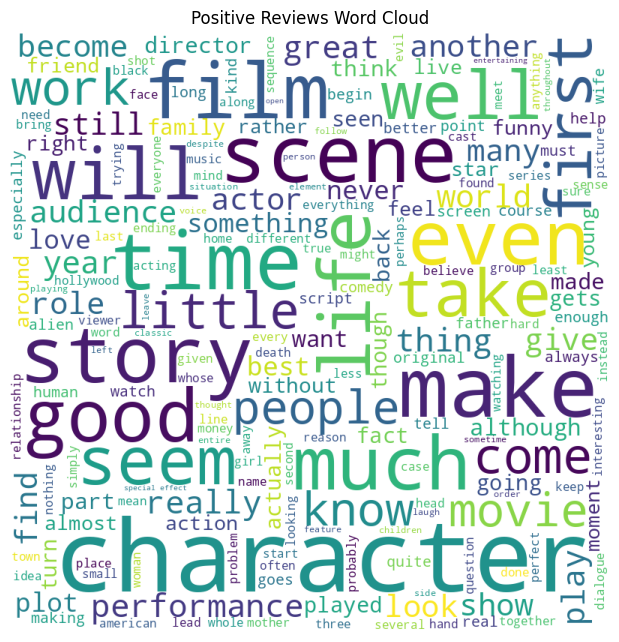

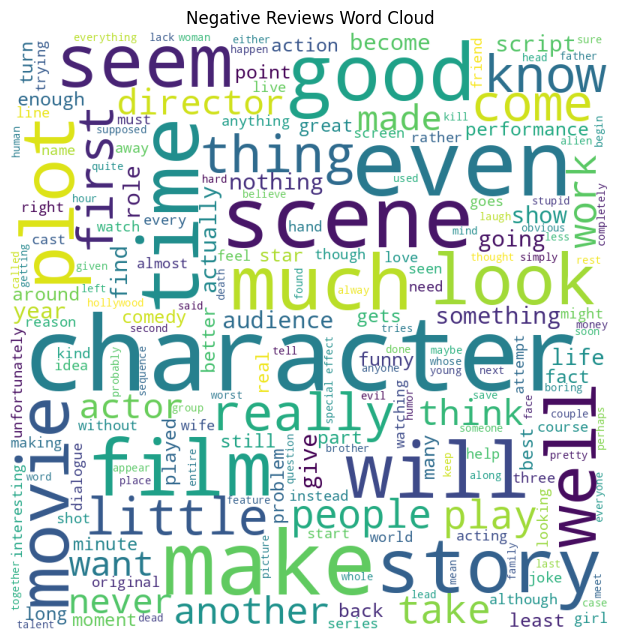

In [18]:
# Split data into separate DataFrames based on sentiment
pos_df = cleaned_df[cleaned_df['Reviewclass'] == 'pos']
neg_df = cleaned_df[cleaned_df['Reviewclass'] == 'neg']

# Create word clouds for the positive and negative reviews
pos_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(pos_df['Text'].tolist()))
neg_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(neg_df['Text'].tolist()))

# Display the word clouds for positive and negative reviews
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

### Creatin two more dataframes. The first will use lemming and the second will have only 30 features.

In [7]:
lemmatized_df = cleaned_df.copy()
#lemmatized_df['Text'] = cleaned_df['Text'].apply(lemmatization)
lemmatizer = WordNetLemmatizer()
lemmatized_df['Text'] = lemmatized_df['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

####Second dataframe - lemmatized dataframe

In [8]:
lemmatized_df

,Text,Reviewclass
0,plot teen couple church party drink drive acci...,neg
1,happy bastard quick review damn head start sta...,neg
2,movie make jaded viewer thankful invention tim...,neg
3,quest camelot warner bros first feature length...,neg
4,synopsis mentally unstable undergoing psychoth...,neg
...,...,...
1995,everything funny dramatic interesting weird fu...,pos
1996,richard gere commanding actor always great fil...,pos
1997,glory starring matthew broderick denzel washin...,pos
1998,steven spielberg second epic world unquestione...,pos


In [9]:
labels_DF = DataFrame(list(lemmatized_df['Reviewclass']),columns=['Reviewclass'])

# Lemmatized CountVectorizer
lem_cv = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{4,}\b',
                                max_features=50)
lem_df = pd.DataFrame(lem_cv.fit_transform(lemmatized_df['Text']).toarray(), columns=lem_cv.get_feature_names_out())


lem_dfs = [labels_DF, lem_df]
labeled_lemmatized_df = pd.concat(lem_dfs,axis=1, join='inner')
labeled_lemmatized_df

,Reviewclass,action,actor,actually,audience,best,better,character,come,comedy,...,star,story,thing,think,time,want,woman,work,world,year
0,neg,0,1,2,2,0,0,3,0,0,...,0,0,2,0,0,1,0,0,2,1
1,neg,1,0,0,0,0,0,0,1,0,...,1,1,1,0,1,0,0,1,0,0
2,neg,0,0,0,3,1,0,3,1,0,...,0,0,2,0,2,0,0,0,0,0
3,neg,0,1,0,0,1,0,1,0,1,...,0,1,1,0,1,0,0,0,0,1
4,neg,0,2,1,2,0,0,1,0,0,...,3,3,0,0,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,pos,0,0,0,0,6,0,0,1,0,...,0,0,1,1,4,1,1,0,1,3
1996,pos,0,1,1,0,0,0,0,3,0,...,0,2,0,0,1,0,0,1,0,0
1997,pos,3,0,0,0,0,0,1,1,0,...,0,2,0,0,2,0,0,0,0,0
1998,pos,0,3,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,1,2,1


#### For third dataframe - 30features dataframe

In [71]:
# Initialize the TfidfVectorizer with 30 features
feature30_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{4,}\b', max_features=30)

# Fit and transform the 'text' column
dtm_30features = feature30_vectorizer.fit_transform(lemmatized_df['Text'])
col_names_30features = feature30_vectorizer.get_feature_names_out()
# Create a new dataframe with the transformed data and the labels
no_label_df_30features = pd.DataFrame(dtm_30features.toarray(), columns=col_names_30features)

labels_DF = DataFrame(list(lemmatized_df['Reviewclass']),columns=['Reviewclass'])
#author_DF = DataFrame(list(quotes_df['clean_author']),columns=['authors'])

cv_dfs = [labels_DF, no_label_df_30features]
df_30features = pd.concat(cv_dfs,axis=1, join='inner')
#df_30features['Reviewclass'] = lemmatized_df['Reviewclass']

In [11]:
df_30features

,Reviewclass,action,actor,audience,best,character,come,director,film,good,...,plot,really,role,scene,star,story,thing,time,work,year
0,neg,0.000000,0.127826,0.268230,0.000000,0.266440,0.000000,0.116506,0.324925,0.202913,...,0.119454,0.244771,0.000000,0.204721,0.000000,0.000000,0.231057,0.000000,0.000000,0.112612
1,neg,0.218388,0.000000,0.000000,0.000000,0.000000,0.174561,0.000000,0.000000,0.154127,...,0.000000,0.371843,0.000000,0.000000,0.209025,0.161190,0.175505,0.136987,0.185805,0.000000
2,neg,0.000000,0.000000,0.506021,0.155089,0.335096,0.144517,0.000000,0.136217,0.000000,...,0.300471,0.461764,0.000000,0.000000,0.000000,0.000000,0.290595,0.226819,0.000000,0.000000
3,neg,0.000000,0.393314,0.000000,0.379431,0.273275,0.000000,0.000000,0.000000,0.312177,...,0.000000,0.000000,0.000000,0.314960,0.000000,0.326482,0.355476,0.277461,0.000000,0.346503
4,neg,0.000000,0.311849,0.327193,0.000000,0.108336,0.000000,0.000000,0.132117,0.123759,...,0.145713,0.149288,0.000000,0.124862,0.503518,0.388290,0.000000,0.329988,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,pos,0.000000,0.000000,0.000000,0.468318,0.000000,0.072732,0.000000,0.137110,0.256873,...,0.000000,0.077465,0.253630,0.000000,0.000000,0.000000,0.073125,0.228307,0.000000,0.213838
1996,pos,0.000000,0.231656,0.000000,0.000000,0.000000,0.624732,0.000000,0.196285,0.000000,...,0.000000,0.000000,0.000000,0.371012,0.000000,0.384586,0.000000,0.163420,0.221657,0.000000
1997,pos,0.444551,0.000000,0.000000,0.000000,0.091548,0.118446,0.120094,0.223287,0.000000,...,0.000000,0.126154,0.413042,0.422052,0.000000,0.218746,0.000000,0.185901,0.000000,0.000000
1998,pos,0.000000,0.573352,0.000000,0.000000,0.265577,0.000000,0.000000,0.485808,0.151692,...,0.178601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134822,0.182868,0.168371


## Part 3: Latent Dirichlet Allocation

In [69]:
lda_tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                  stop_words = 'english',
                                  lowercase = True,
                                  token_pattern = r'\b[a-zA-Z]{4,}\b')

def perform_lda(df, isVectorized = False, ColumnNames = None, vectorizerName = None):
  if isVectorized:
    dtm_tf = df
    ColumnNames = ColumnNames
    vectorizer = vectorizerName
  else:
    vectorizer = lda_tf_vectorizer
    dtm_tf = vectorizer.fit_transform(df['Text'])
    ColumnNames=vectorizer.get_feature_names_out()
  ## Build the data frame
  #MyDTM_DF=pd.DataFrame(dtm_tf.toarray(),columns=ColumnNames)
  # for TF DTM
  lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
  lda_tf.fit(dtm_tf)

  print("Visualization")
  panel = pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, vectorizer)
  #pyLDAvis.display(panel)
  #pyLDAvis.save_html(panel, "ldaVis.html")
  return panel, lda_tf, ColumnNames  


def top_words(lda_tf, ColumnNames):
  print("Top 10 words in SIX TOPICS")
  word_topic = np.array(lda_tf.components_)
  word_topic = word_topic.transpose()
  num_top_words = 10
  NUM_TOPICS = 6
  vocab_array = np.asarray(ColumnNames)
  fontsize_base = 8
  for t in range(NUM_TOPICS):
      plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
      plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
      plt.xticks([])  # remove x-axis markings ('ticks')
      plt.yticks([]) # remove y-axis markings ('ticks')
      plt.title('Topic #{}'.format(t))
      top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
      top_words_idx = top_words_idx[:num_top_words]
      top_words = vocab_array[top_words_idx]
      top_words_shares = word_topic[top_words_idx, t]
      for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
          plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)

  # Print the top words in each topic and the associated probability distribution
  feature_names = ColumnNames
  for topic_idx, topic in enumerate(lda_tf.components_):
     print("Topic %d:" % (topic_idx))
     print(" ".join([feature_names[i] + ' (' + str(round(topic[i], 2)) + ')' for i in topic.argsort()[:-11:-1]]))
     print()

### For first dataframe - cleaned dataframe

In [13]:
#For first dataframe - cleaned dataframe
panel, lda_tf, ColumnNames  = perform_lda(cleaned_df)
pyLDAvis.display(panel)

Visualization


Top 10 words in SIX TOPICS
Topic 0:
life (81.59) make (73.41) good (61.24) time (58.4) story (57.24) people (56.07) character (54.14) best (52.91) scene (52.16) family (49.86)

Topic 1:
time (222.96) plot (199.67) characters (179.29) good (175.53) disney (172.48) story (140.24) little (128.49) character (127.16) make (121.74) love (120.57)

Topic 2:
action (281.95) time (260.49) good (224.72) movies (202.94) scenes (201.08) films (186.95) really (182.59) scene (170.79) jackie (170.52) people (164.44)

Topic 3:
character (65.8) time (64.18) sandler (61.35) life (57.6) good (52.3) characters (49.07) wedding (46.85) love (44.23) thing (44.15) story (42.89)

Topic 4:
derek (46.9) family (32.31) story (32.0) deep (28.9) films (25.63) girl (24.41) little (23.82) audience (23.09) character (23.02) time (22.88)

Topic 5:
good (115.51) better (60.28) bulworth (60.05) really (59.91) time (58.42) story (47.91) tarzan (44.02) characters (43.42) chris (41.97) director (41.61)

Topic 6:
good (135.5)

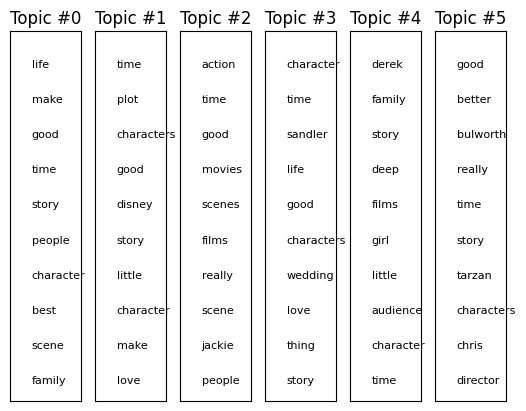

In [14]:
top_words(lda_tf, ColumnNames)


### For second dataframe - lemmatized dataframe

In [15]:
#For second dataframe - lemmatized dataframe
lem_panel, lem_lda_tf, lem_ColumnNames = perform_lda(lemmatized_df)
pyLDAvis.display(lem_panel)

Visualization


Top 10 words in SIX TOPICS
Topic 0:
vampire (83.34) story (79.45) character (38.71) time (37.32) murder (36.6) life (34.04) make (33.79) scene (31.03) hollow (30.38) sleepy (30.34)

Topic 1:
shrek (63.05) character (35.73) jawbreaker (30.05) good (26.32) donkey (24.05) fiona (23.5) farquaad (23.05) role (22.27) movie (22.1) princess (21.52)

Topic 2:
character (215.9) good (157.83) make (148.64) time (148.03) film (117.63) people (117.59) come (114.14) best (112.44) plot (110.78) comedy (109.96)

Topic 3:
thing (78.28) flynt (77.0) character (72.97) story (64.43) scene (55.95) film (50.41) make (44.96) love (44.82) wild (43.3) time (41.61)

Topic 4:
time (81.37) character (76.23) scene (74.11) year (70.64) wedding (63.0) story (61.74) good (60.99) life (60.94) movie (51.7) blade (47.66)

Topic 5:
character (143.31) scream (125.56) disney (100.98) tarzan (99.25) life (88.43) story (78.81) year (76.67) time (74.41) film (71.2) little (69.17)

Topic 6:
character (391.89) time (293.57) sce

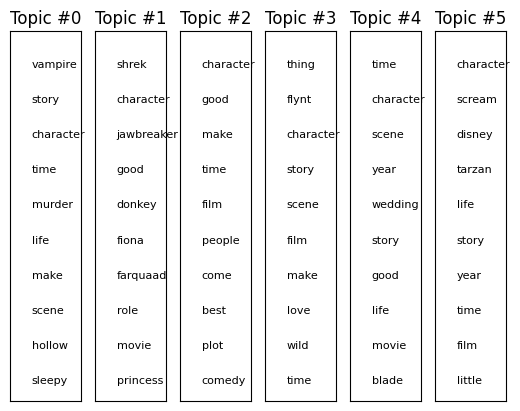

In [16]:
top_words(lem_lda_tf, lem_ColumnNames)

### For third dataframe - 30features dataframe

In [72]:
#For third dataframe - 30features dataframe
feature_panel, feature_lem_lda_tf, feature_lem_ColumnNames = perform_lda(dtm_30features, True, col_names_30features, feature30_vectorizer)
pyLDAvis.display(feature_panel)

Visualization


Top 10 words in SIX TOPICS
Topic 0:
love (87.11) character (36.12) story (33.84) scene (28.87) make (27.68) life (25.58) time (25.21) performance (22.81) year (21.23) thing (19.53)

Topic 1:
role (38.63) play (33.5) character (32.35) performance (32.22) good (27.64) time (22.67) actor (19.51) scene (18.7) make (18.62) really (18.3)

Topic 2:
life (32.41) year (19.3) work (14.33) time (12.74) role (11.74) character (11.69) make (11.2) come (9.66) story (9.48) best (8.19)

Topic 3:
star (73.61) character (33.11) time (25.68) scene (24.12) good (22.57) movie (20.26) film (20.04) make (19.18) story (18.76) year (17.1)

Topic 4:
love (0.05) movie (0.05) action (0.05) star (0.05) great (0.05) people (0.05) story (0.05) look (0.05) plot (0.05) year (0.05)

Topic 5:
life (49.36) character (21.8) time (16.66) film (16.15) director (12.59) make (12.26) come (12.24) story (11.62) audience (11.09) year (9.71)

Topic 6:
look (41.75) make (17.0) character (14.9) good (13.9) film (13.67) time (13.64)

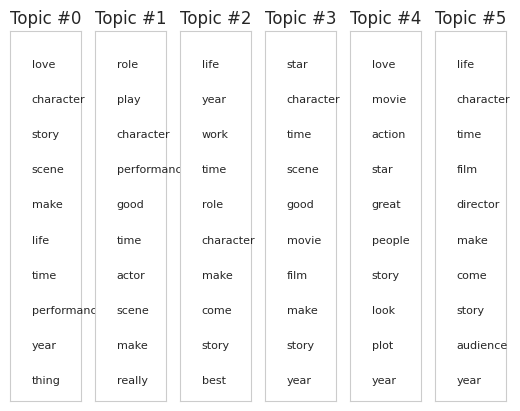

In [73]:
top_words(feature_lem_lda_tf, feature_lem_ColumnNames)

##Part 5: Clustering

###For third dataframe - 30features dataframe

Cluster Centroids:
Centroid 0: [0.03679203 0.07280749 0.08280008 0.09617497 0.26032791 0.11139782
 0.08656113 0.10746069 0.09405641 0.08370629 0.08090517 0.21465328
 0.09152403 0.07658972 0.14535875 0.13566    0.06626019 0.10657161
 0.10728078 0.08801244 0.07365772 0.06954791 0.08585529 0.11671196
 0.05843323 0.21558941 0.08514173 0.13411735 0.09902343 0.10838609]
Centroid 1: [0.14053175 0.09509342 0.08057043 0.08732954 0.12697919 0.08733139
 0.09878775 0.14473146 0.16437599 0.07980813 0.10655389 0.05444788
 0.10016024 0.10134724 0.04903444 0.14150256 0.1359134  0.09225652
 0.07771688 0.08419965 0.13331203 0.12238987 0.08264139 0.16584387
 0.1089875  0.08068059 0.12023135 0.16211901 0.0888638  0.11269171]


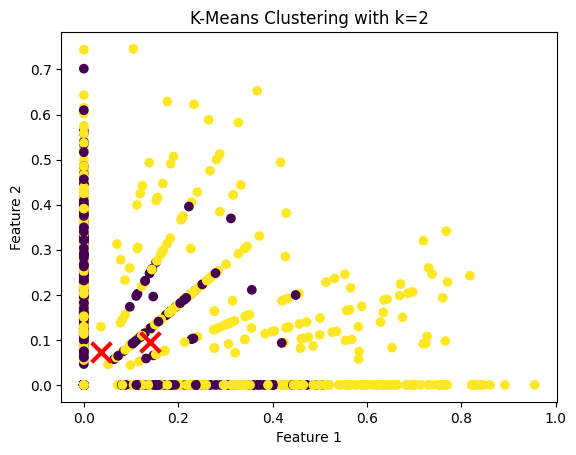

Number of positive test data points closer to pos centroid: 8
Number of negative test data points closer to neg centroid: 12


In [18]:
# Remove the labels and set them aside
labels = df_30features['Reviewclass']
data = df_30features.drop('Reviewclass', axis=1)

# set aside 20 pos and 20 neg test rows
pos_test = data[labels=='pos'].head(20)
neg_test = data[labels=='neg'].head(20)

# Set aside 20 pos rows and 20 neg rows for testing
test_data = pd.concat([data[labels=='pos'].head(20), data[labels=='neg'].head(20)])
test_labels = pd.concat([labels[labels=='pos'].head(20), labels[labels=='neg'].head(20)])

# Remove the test data from the original data
data = data.drop(test_data.index)

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
# visualize the clusters
centroids = kmeans.cluster_centers_
# print the centroids
print('Cluster Centroids:')
# Print centroids
print("Centroid 0:", centroids[0])
print("Centroid 1:", centroids[1])

# Plot the data with the centroids
#plt.scatter(data.iloc[:,0], data.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker='x', s=200)
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-Means Clustering with k=2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculate the distances from the test data to the centroids
centroid_distances = kmeans.transform(test_data)

# Assign each test data point to the nearest centroid
predicted_labels = np.argmin(centroid_distances, axis=1)

# Count the number of pos and neg test data points in each cluster
pos_count = np.bincount(test_labels[predicted_labels==0]=='pos')
neg_count = np.bincount(test_labels[predicted_labels==1]=='neg')

print('Number of positive test data points closer to pos centroid:', pos_count[1])
print('Number of negative test data points closer to neg centroid:', neg_count[0])


In [19]:
from scipy.spatial.distance import euclidean

# Calculate distances from pos_test to centroids
pos_distances = np.zeros((20, 2))
for i in range(20):
    for j in range(2):
        pos_distances[i, j] = euclidean(pos_test.iloc[i], centroids[j])

# Calculate distances from neg_test to centroids
neg_distances = np.zeros((20, 2))
for i in range(20):
    for j in range(2):
        neg_distances[i, j] = euclidean(neg_test.iloc[i], centroids[j])

# Find which cluster each test vector belongs to
pos_clusters = np.argmin(pos_distances, axis=1)
neg_clusters = np.argmin(neg_distances, axis=1)

# Count number of pos and neg vectors in each cluster
pos_cluster_counts = np.bincount(pos_clusters, minlength=2)
neg_cluster_counts = np.bincount(neg_clusters, minlength=2)

# Print results
print('Number of pos vectors closer to pos centroid:', pos_cluster_counts[0])
print('Number of pos vectors closer to neg centroid:', pos_cluster_counts[1])
print('Number of neg vectors closer to pos centroid:', neg_cluster_counts[0])
print('Number of neg vectors closer to neg centroid:', neg_cluster_counts[1])


Number of pos vectors closer to pos centroid: 8
Number of pos vectors closer to neg centroid: 12
Number of neg vectors closer to pos centroid: 4
Number of neg vectors closer to neg centroid: 16


In [20]:
#visualize the distances between the test rows and the centroids using a heatmap.
#import seaborn as sns

# concatenate pos_distances and neg_distances vertically
#distances = np.vstack([pos_distances, neg_distances])

# create a dataframe of the distances
#dist_df = pd.DataFrame({
 #   'centroid_0': distances[:, 0],
  #  'centroid_1': distances[:, 1],
   # 'true_label': ['pos']*len(pos_distances) + ['neg']*len(neg_distances)
#})

# melt the dataframe to plot a heatmap
#melted_df = pd.melt(dist_df, id_vars='true_label', var_name='centroid', value_name='distance')

# plot the heatmap
#sns.heatmap(melted_df.pivot("centroid", "true_label", "distance"), annot=True, cmap="YlGnBu")


##Part 6: Naïve Bayes, Decision Trees, and SVMs

### Train and Test Data Spliting

In [21]:
def test_train_split(data_df):
    X = data_df.drop('Reviewclass', axis=1)
    y = data_df['Reviewclass']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

####For first dataframe - cleaned dataframe

In [22]:
df1_train_data, df1_test_data,df1_train_label, df1_test_label = test_train_split(labeled_cleaned_df)

Part 1: Training Data

In [23]:
df1_train_data

,action,actually,audience,best,better,cast,character,characters,come,comedy,...,star,story,thing,things,think,time,work,world,year,years
968,0,0,1,0,0,0,2,4,0,1,...,1,0,1,0,1,1,0,0,0,0
240,0,0,0,0,0,1,0,3,0,0,...,1,1,0,0,0,0,0,0,0,0
819,4,1,0,0,0,0,0,1,1,0,...,1,1,0,0,1,1,1,0,0,0
692,0,1,0,1,0,0,1,3,0,0,...,0,1,1,0,0,2,1,0,2,0
420,1,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,0,2,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,1
1294,1,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,4,0,2,0,1
860,0,1,0,1,0,0,0,0,0,1,...,0,0,2,1,1,1,0,0,0,0
1459,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Part 2: Training Labels

In [24]:
df1_train_label

968     neg
240     neg
819     neg
692     neg
420     neg
       ... 
1130    pos
1294    pos
860     neg
1459    pos
1126    pos
Name: Reviewclass, Length: 1600, dtype: object

Part 3: Testing Data

In [25]:
df1_test_data

,action,actually,audience,best,better,cast,character,characters,come,comedy,...,star,story,thing,things,think,time,work,world,year,years
1860,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,4,0,0,1
353,0,0,0,0,1,0,2,2,0,0,...,0,0,0,0,2,2,1,0,1,0
1333,0,1,1,2,0,0,1,1,0,1,...,0,1,0,1,2,1,2,2,2,0
905,0,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,3,0,1,1
1289,2,0,0,0,0,4,1,0,0,0,...,10,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0,0,0,0,1,1,1,1,1,0,...,0,2,0,1,0,1,1,0,0,0
1284,2,1,0,0,1,0,1,1,3,0,...,0,3,1,1,4,2,1,0,2,0
1739,0,1,0,1,1,3,1,0,0,1,...,3,0,0,0,0,0,1,0,1,0
261,1,0,0,0,3,0,4,0,0,0,...,0,2,0,1,2,3,0,2,1,1


Part 4: Testing Labels

In [26]:
df1_test_label

1860    pos
353     neg
1333    pos
905     neg
1289    pos
       ... 
965     neg
1284    pos
1739    pos
261     neg
535     neg
Name: Reviewclass, Length: 400, dtype: object

####For second dataframe - lemmatized dataframe

In [27]:
df2_train_data, df2_test_data,df2_train_label, df2_test_label = test_train_split(labeled_lemmatized_df)

Part 1: Training Data

In [28]:
df2_train_data

,action,actor,actually,audience,best,better,character,come,comedy,director,...,star,story,thing,think,time,want,woman,work,world,year
968,0,3,0,1,0,0,6,0,1,0,...,1,0,1,1,2,0,2,0,0,0
240,0,0,0,0,0,0,3,2,0,1,...,1,1,0,0,0,0,0,0,0,0
819,4,0,1,0,0,0,1,3,0,0,...,1,1,0,2,2,1,0,2,0,0
692,0,0,1,0,1,0,4,0,0,1,...,2,2,1,0,2,0,1,1,0,2
420,1,0,0,0,0,1,1,0,1,0,...,0,0,1,0,2,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,1,0,2,0,1,1,1,0,...,2,0,0,1,0,1,0,2,0,2
1294,1,1,0,0,1,0,1,1,0,0,...,0,1,0,0,4,1,0,0,2,1
860,0,0,1,0,1,0,0,0,1,0,...,0,0,3,1,1,2,0,0,0,0
1459,0,0,0,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


Part 2: Training Labels

In [29]:
df2_train_label

968     neg
240     neg
819     neg
692     neg
420     neg
       ... 
1130    pos
1294    pos
860     neg
1459    pos
1126    pos
Name: Reviewclass, Length: 1600, dtype: object

Part 3: Testing Data

In [30]:
df2_test_data

,action,actor,actually,audience,best,better,character,come,comedy,director,...,star,story,thing,think,time,want,woman,work,world,year
1860,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,3,0,1,4,0,1
353,0,0,0,0,0,1,4,0,0,2,...,0,0,0,2,2,1,0,1,0,1
1333,1,1,1,1,2,0,2,0,1,1,...,0,1,1,2,1,1,2,4,2,2
905,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,3,0,2
1289,2,0,0,0,0,0,1,0,0,0,...,10,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0,3,0,0,0,1,2,1,0,1,...,0,2,1,0,1,0,0,1,0,0
1284,2,0,1,0,0,1,2,3,0,0,...,0,3,2,4,2,1,0,2,0,2
1739,0,0,1,0,1,1,1,0,1,0,...,3,0,0,0,0,0,0,1,0,1
261,1,0,0,0,0,3,4,0,0,1,...,0,2,1,2,3,0,0,0,2,2


Part 4: Testing Labels

In [31]:
df2_test_label

1860    pos
353     neg
1333    pos
905     neg
1289    pos
       ... 
965     neg
1284    pos
1739    pos
261     neg
535     neg
Name: Reviewclass, Length: 400, dtype: object

####For third dataframe - 30features dataframe

In [32]:
df3_train_data, df3_test_data,df3_train_label, df3_test_label = test_train_split(df_30features)

Part 1: Training Data

In [33]:
df3_train_data

,action,actor,audience,best,character,come,director,film,good,great,...,plot,really,role,scene,star,story,thing,time,work,year
968,0.000000,0.349326,0.122171,0.000000,0.485424,0.000000,0.000000,0.295989,0.000000,0.000000,...,0.108816,0.000000,0.000000,0.372980,0.125340,0.000000,0.105240,0.164287,0.000000,0.000000
240,0.000000,0.000000,0.000000,0.000000,0.469070,0.404592,0.205110,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.470295,0.000000,0.242235,0.186800,0.000000,0.000000,0.000000,0.000000
819,0.516460,0.000000,0.000000,0.000000,0.079768,0.309612,0.000000,0.097277,0.182246,0.000000,...,0.000000,0.329761,0.000000,0.367741,0.123579,0.095299,0.000000,0.161979,0.219703,0.000000
692,0.000000,0.000000,0.000000,0.113636,0.327373,0.000000,0.107363,0.099808,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.094327,0.253590,0.195557,0.106462,0.166194,0.112710,0.207549
420,0.193955,0.000000,0.000000,0.000000,0.119826,0.000000,0.000000,0.292257,0.000000,0.000000,...,0.322333,0.000000,0.000000,0.138104,0.000000,0.000000,0.155870,0.243323,0.330035,0.151935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.000000,0.162213,0.000000,0.312974,0.112706,0.145819,0.000000,0.137445,0.128750,0.173513,...,0.000000,0.000000,0.338999,0.000000,0.349217,0.000000,0.000000,0.000000,0.310423,0.285814
1294,0.155861,0.138589,0.000000,0.133697,0.096291,0.124583,0.000000,0.469712,0.000000,0.148243,...,0.388538,0.000000,0.000000,0.000000,0.000000,0.115040,0.000000,0.391066,0.000000,0.122094
860,0.000000,0.000000,0.000000,0.188735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.374627,0.000000,0.000000,0.000000,0.000000,0.530457,0.138013,0.000000,0.000000
1459,0.000000,0.000000,0.439923,0.000000,0.000000,0.000000,0.000000,0.532908,0.000000,0.000000,...,0.391833,0.401447,0.000000,0.000000,0.000000,0.174023,0.000000,0.147894,0.000000,0.184695


Part 2: Training Labels

In [34]:
df3_train_label

968     neg
240     neg
819     neg
692     neg
420     neg
       ... 
1130    pos
1294    pos
860     neg
1459    pos
1126    pos
Name: Reviewclass, Length: 1600, dtype: object

Part 3: Testing Data

In [35]:
df3_test_data

,action,actor,audience,best,character,come,director,film,good,great,...,plot,really,role,scene,star,story,thing,time,work,year
1860,0.121914,0.000000,0.000000,0.000000,0.075319,0.000000,0.000000,0.000000,0.172083,0.000000,...,0.000000,0.103790,0.113273,0.607657,0.116688,0.000000,0.000000,0.229418,0.414900,0.095502
353,0.000000,0.000000,0.000000,0.000000,0.340661,0.000000,0.223441,0.103860,0.194579,0.262229,...,0.000000,0.000000,0.000000,0.098156,0.000000,0.000000,0.000000,0.172940,0.117285,0.107987
1333,0.140248,0.124706,0.130842,0.240608,0.173291,0.000000,0.113663,0.211330,0.098980,0.000000,...,0.000000,0.119398,0.000000,0.199725,0.000000,0.103516,0.112709,0.087973,0.477294,0.219728
905,0.000000,0.177913,0.000000,0.000000,0.123614,0.000000,0.162158,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.142470,0.000000,0.147682,0.000000,0.000000,0.510702,0.313476
1289,0.182459,0.000000,0.000000,0.000000,0.056362,0.000000,0.000000,0.068734,0.193156,0.000000,...,0.075807,0.000000,0.000000,0.000000,0.873185,0.134672,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0.000000,0.468380,0.000000,0.000000,0.216953,0.140348,0.142301,0.264576,0.000000,0.167003,...,0.145902,0.000000,0.000000,0.125024,0.000000,0.259195,0.141107,0.110138,0.149388,0.000000
1284,0.251554,0.000000,0.000000,0.000000,0.155411,0.301608,0.000000,0.094762,0.088767,0.119630,...,0.000000,0.428314,0.000000,0.447793,0.000000,0.278505,0.202158,0.157791,0.214023,0.197056
1739,0.000000,0.000000,0.000000,0.204403,0.147215,0.000000,0.000000,0.000000,0.000000,0.226642,...,0.198005,0.202864,0.000000,0.169671,0.684218,0.000000,0.000000,0.000000,0.202736,0.186664
261,0.131595,0.000000,0.000000,0.000000,0.325200,0.000000,0.106650,0.495729,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.187403,0.000000,0.194259,0.105755,0.247636,0.000000,0.206171


Part 4: Testing Labels

In [36]:
df3_test_label

1860    pos
353     neg
1333    pos
905     neg
1289    pos
       ... 
965     neg
1284    pos
1739    pos
261     neg
535     neg
Name: Reviewclass, Length: 400, dtype: object

### Naïve Bayes (NB) and Results

In [37]:
def perform_multinomial_nb(df, X_train, X_test , y_train, y_test):
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    probs = nb.predict_proba(X_test) 
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, cm, probs, accuracy

####For first dataframe - cleaned dataframe

In [38]:
# Print results for Multinomial NB with cleaned dataframe
print("Results for Multinomial NB with cleaned dataframe:")
df1_y_pred, df1_cm, df1_probs, df1_accuracy= perform_multinomial_nb(labeled_cleaned_df, df1_train_data, df1_test_data,df1_train_label, df1_test_label)

Results for Multinomial NB with cleaned dataframe:


Actual labels

In [39]:
df1_test_label.values

array(['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg',

Predicted labels

In [40]:
df1_y_pred

array(['pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg',
       'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'neg',

Confusion matrix


The confusion matrix is:
[[129  70]
 [ 77 124]]
Accuracy : 0.6325


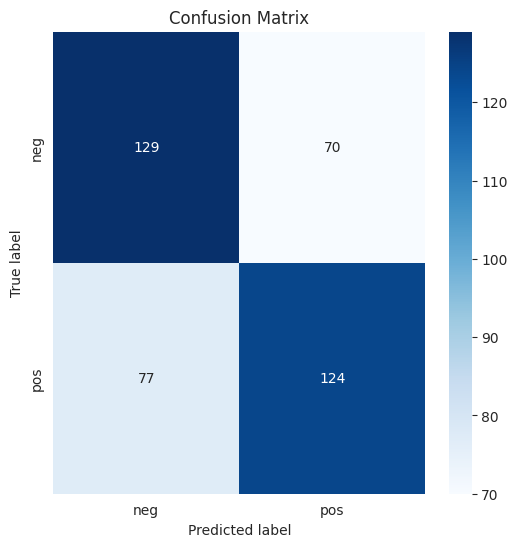

In [76]:
print("\nThe confusion matrix is:")
print(df1_cm)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(y_test, y_predict)
print('Accuracy :', df1_accuracy)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
# plot the confusion matrix
sns.heatmap(df1_cm, annot=True, cmap='Blues', fmt='g', xticklabels=sentiment_labels, 
                    yticklabels=sentiment_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

####For second dataframe - lemmatized dataframe

In [42]:
# Print results for Multinomial NB with lemmatized dataframe
print("Results for Multinomial NB with lemmatized dataframe:")
df2_y_pred, df2_cm, df2_probs, df2_accuracy = perform_multinomial_nb(labeled_lemmatized_df, df2_train_data, df2_test_data,df2_train_label, df2_test_label)

Results for Multinomial NB with lemmatized dataframe:


Actual labels

In [43]:
df2_test_label.values

array(['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg',

Predicted labels

In [44]:
df2_y_pred

array(['pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos',
       'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg',
       'pos', 'neg',

Confusion matrix


The confusion matrix is:
[[129  70]
 [ 74 127]]
Accuracy : 0.64


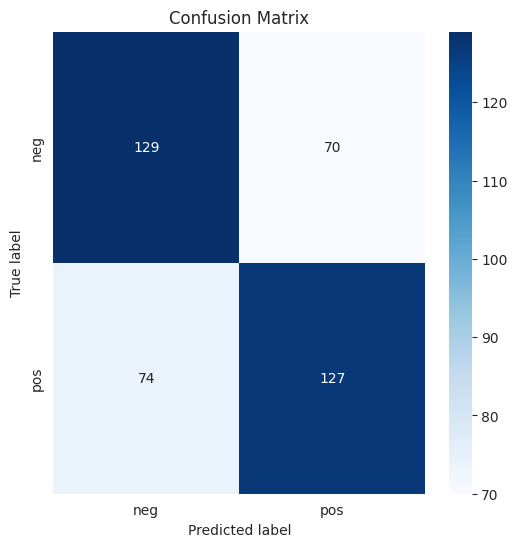

In [77]:
print("\nThe confusion matrix is:")
print(df2_cm)

# Evaluate the accuracy of the model
print('Accuracy :', df2_accuracy)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(df2_cm, annot=True, cmap='Blues', fmt='g', xticklabels=sentiment_labels, 
                    yticklabels=sentiment_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

####For third dataframe - 30features dataframe

In [46]:
# Print results for Multinomial NB with 30features dataframe
print("Results for Multinomial NB with 30features dataframe:")
df3_y_pred, df3_cm, df3_probs, df3_accuracy = perform_multinomial_nb(labeled_lemmatized_df, df3_train_data, df3_test_data, df3_train_label, df3_test_label)

Results for Multinomial NB with 30features dataframe:


Actual labels

In [47]:
df3_test_label.values

array(['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg',

Predicted labels

In [48]:
df3_y_pred

array(['pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos',
       'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos',
       'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg',
       'pos', 'neg',

Confusion matrix


The confusion matrix is:
[[120  79]
 [ 71 130]]
Accuracy: 0.625


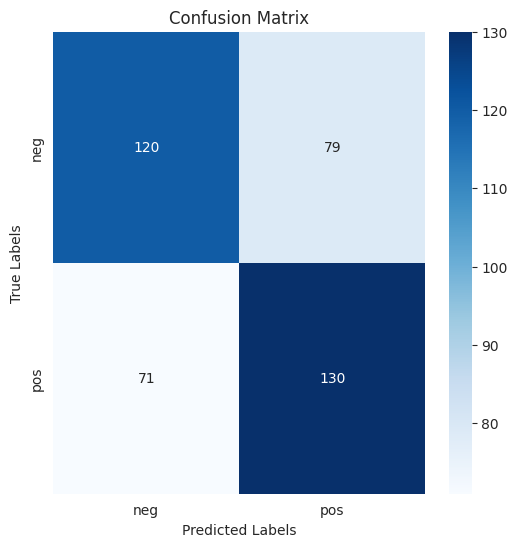

In [78]:
print("\nThe confusion matrix is:")
print(df3_cm)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(y_test, y_predict)
print('Accuracy:', df3_accuracy)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(df3_cm, annot=True, cmap='Blues', fmt='g', xticklabels=sentiment_labels, 
                    yticklabels=sentiment_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Decision Trees and Results

In [50]:
def train_decision_tree(df, X_train, X_test , y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    dtc = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=3)
    dtc.fit(X_train_scaled, y_train)
    y_pred = dtc.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, cm, dtc, accuracy

####For first dataframe - cleaned dataframe

In [51]:
# Print results for Decision Trees (DT) with cleaned dataframe
print("Results for Decision Trees (DT) with cleaned dataframe:")
df1_dt_y_pred, df1_dt_cm, df1_dtc, df1_dt_accuracy = train_decision_tree(labeled_cleaned_df, df1_train_data, df1_test_data,df1_train_label, df1_test_label)

Results for Decision Trees (DT) with cleaned dataframe:


Actual labels

In [52]:
df1_test_label.values

array(['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg',

Predicted labels

In [53]:
df1_dt_y_pred

array(['neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos',
       'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg',

Confusion matrix


The confusion matrix is:
[[147  52]
 [124  77]]
Accuracy: 56.00%


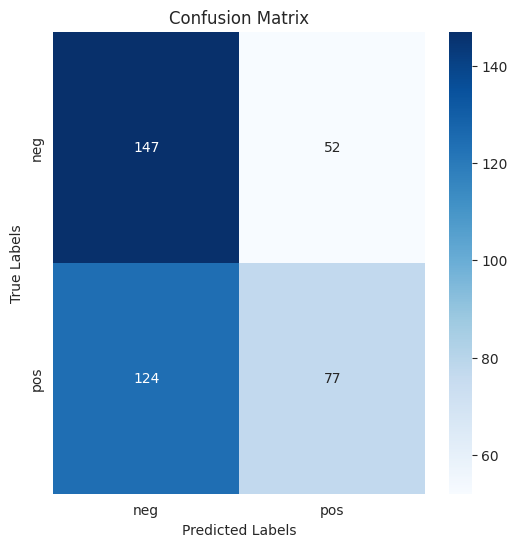

In [79]:
print("\nThe confusion matrix is:")
print(df1_dt_cm)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(df1_test_label, df1_dt_y_pred)
print("Accuracy: {:.2f}%".format(df1_dt_accuracy*100))

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(df1_dt_cm, annot=True, cmap='Blues',fmt='d', xticklabels=sentiment_labels, 
                    yticklabels=sentiment_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Graph

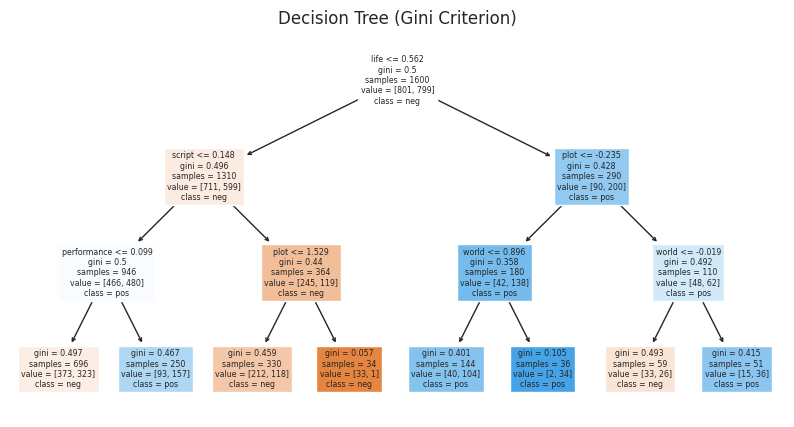

In [55]:
# Visualize the Decision Trees
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
tree.plot_tree(df1_dtc, filled=True,class_names=df1_dtc.classes_, feature_names=cv.get_feature_names_out())
#sns.tree.plot_tree(clf_decision_tree_gini, filled=True, class_names=clf_decision_tree_gini.classes_)
plt.title('Decision Tree (Gini Criterion)')
plt.show()

####For second dataframe - lemmatized dataframe

In [56]:
# Print results for Decision Trees (DT) with lemmatized dataframe
print("Results for Decision Trees (DT) with lemmatized dataframe:")
df2_dt_y_pred, df2_dt_cm, df2_dtc, df2_dt_accuracy = train_decision_tree(labeled_lemmatized_df, df2_train_data, df2_test_data, df2_train_label, df2_test_label)

Results for Decision Trees (DT) with lemmatized dataframe:


Actual labels

In [57]:
df2_test_label.values

array(['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg',

Predicted labels

In [58]:
df2_dt_y_pred

array(['pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos',
       'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos',
       'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg',
       'pos', 'neg',

Confusion Matrix


The confusion matrix is:
[[132  67]
 [105  96]]
Accuracy: 57.00%


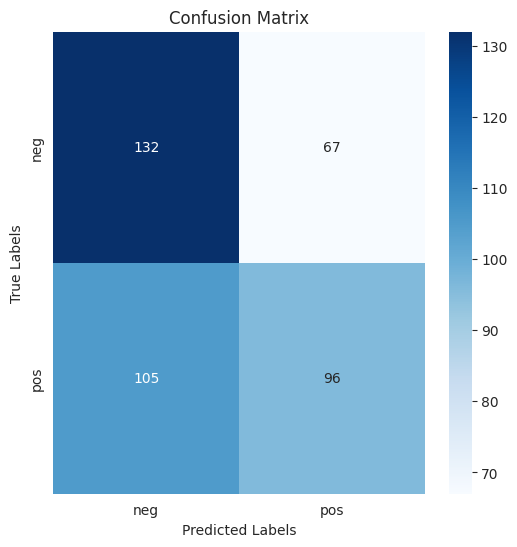

In [80]:
print("\nThe confusion matrix is:")
print(df2_dt_cm)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(df1_test_label, df1_dt_y_pred)
print("Accuracy: {:.2f}%".format(df2_dt_accuracy*100))

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(df2_dt_cm, annot=True, cmap='Blues',fmt='d', xticklabels=sentiment_labels, 
                    yticklabels=sentiment_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Graph

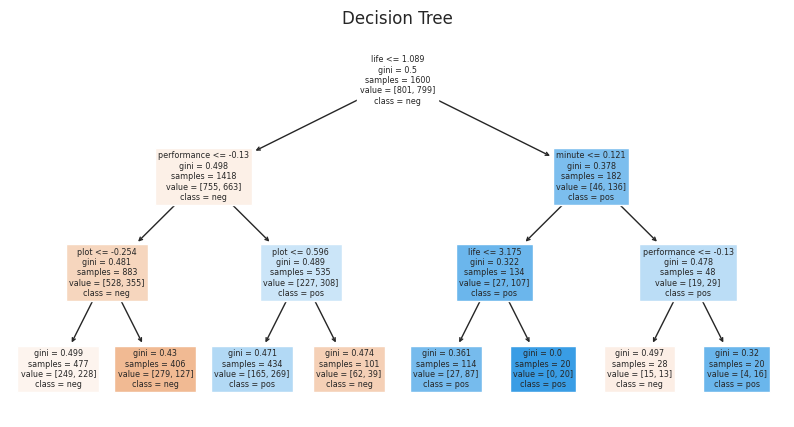

In [60]:
# Visualize the Decision Trees
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
tree.plot_tree(df2_dtc, filled=True,class_names=df2_dtc.classes_, feature_names=lem_cv.get_feature_names_out())
#sns.tree.plot_tree(clf_decision_tree_gini, filled=True, class_names=clf_decision_tree_gini.classes_)
plt.title('Decision Tree')
plt.show()

####For third dataframe - 30features dataframe

In [61]:
# Print results for Decision Trees (DT) with 30features dataframe
print("Results for Decision Trees (DT) with 30features dataframe:")
df3_dt_y_pred, df3_dt_cm, df3_dtc, df3_dt_accuracy = train_decision_tree(df_30features, df3_train_data, df3_test_data, df3_train_label, df3_test_label)

Results for Decision Trees (DT) with 30features dataframe:


Actual labels

In [62]:
df3_test_label.values

array(['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos',
       'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
       'neg', 'neg',

Predicted labels

In [63]:
df3_dt_y_pred

array(['pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg',
       'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg',
       'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos',
       'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos',
       'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos',
       'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos',
       'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg',
       'pos', 'neg',

Confusion Matrix


The confusion matrix is:
[[103  96]
 [ 75 126]]
Accuracy: 57.25%


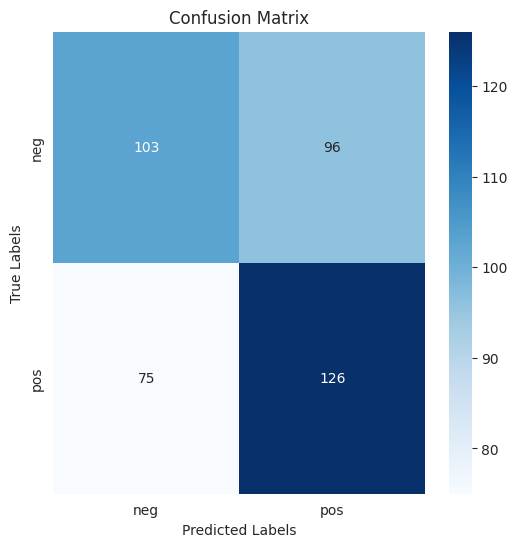

In [81]:
print("\nThe confusion matrix is:")
print(df3_dt_cm)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(df1_test_label, df1_dt_y_pred)
print("Accuracy: {:.2f}%".format(df3_dt_accuracy*100))

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(df3_dt_cm, annot=True, cmap='Blues',fmt='d', xticklabels=sentiment_labels, 
                    yticklabels=sentiment_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Graph

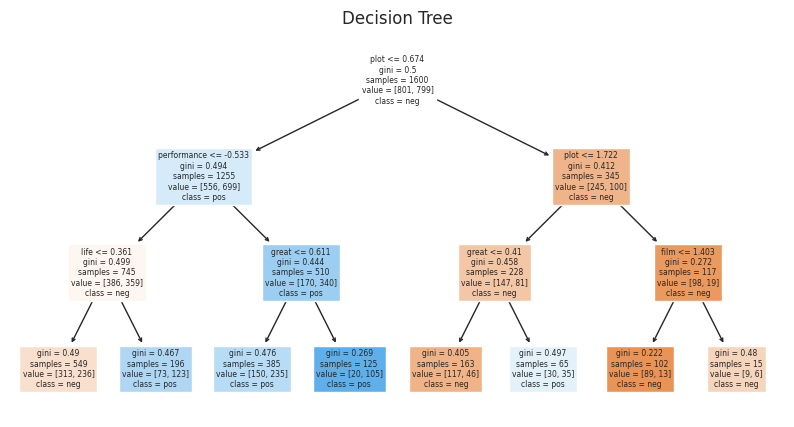

In [65]:
# Visualize the Decision Trees
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
tree.plot_tree(df3_dtc, filled=True,class_names=df3_dtc.classes_, feature_names=vectorizer.get_feature_names_out())
#sns.tree.plot_tree(clf_decision_tree_gini, filled=True, class_names=clf_decision_tree_gini.classes_)
plt.title('Decision Tree')
plt.show()

### Support Vector Machines (SVMs) and Results

In [66]:
# Define kernel and cost options
svm_models = [
        {'name': 'Kernel = Linear, Cost = 1', 'model': SVC(kernel='linear', C=1)},
        {'name': 'Kernel = Polynomial (p=3), Cost = 0.1', 'model': SVC(kernel='poly', degree=3, C=0.1)},
        {'name': 'Kernel = RBF, Cost = 100', 'model': SVC(kernel='rbf', C=100)}
]

def train_svms(df, X_train, X_test , y_train, y_test):
    model_dict = {}
    # Train and evaluate models
    for svm_model in svm_models: 
        # Fit SVM model 
          model = svm_model['model']
          model.fit(X_train, y_train)
          # Predict labels 
          svm_y_pred = model.predict(X_test)
          # Create confusion matrix 
          svm_cm = confusion_matrix(y_test, svm_y_pred)
          # Evaluate the accuracy of the model
          accuracy = accuracy_score(y_test, svm_y_pred)
          model_dict[svm_model['name']] = svm_cm
    return model_dict

#### For first dataframe - cleaned dataframe

In [67]:
# Print results for SVMs with cleaned dataframe
print("Results for SVMs with cleaned dataframe:")
df1_model_dict = train_svms(labeled_cleaned_df, df1_train_data, df1_test_data,df1_train_label, df1_test_label)

Results for SVMs with cleaned dataframe:


Confusion Matrix

For Data Frame 1

Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = Linear, Cost = 1
Accuracy: 61.5
[[127  72]
 [ 82 119]]


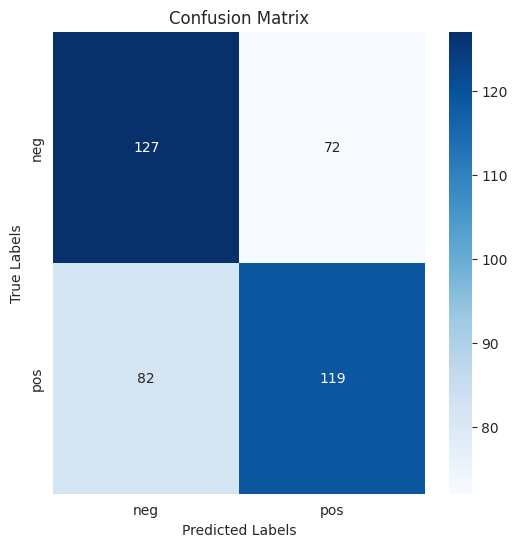



Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = Polynomial (p=3), Cost = 0.1
Accuracy: 60.25
[[188  11]
 [148  53]]


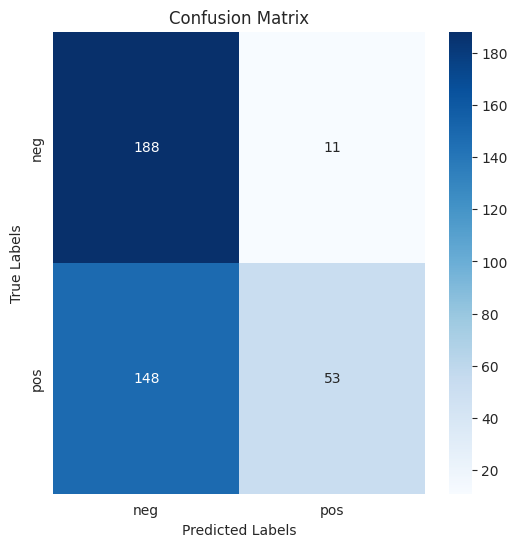



Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = RBF, Cost = 100
Accuracy: 60.25
[[124  75]
 [ 84 117]]


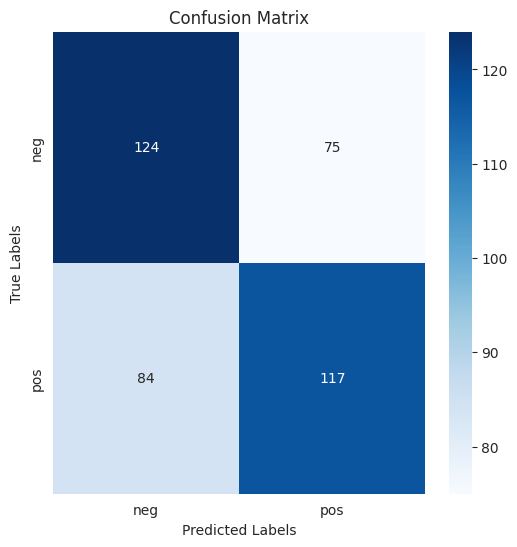

In [82]:
print("For Data Frame 1")
for df1_svm_model, df1_svm_cm in df1_model_dict.items():
  print("\nBelow is The Accuracy and confusion matrix of SVM MODEL with:",df1_svm_model)
  df1_svm_acc = ((df1_svm_cm[0][0] + df1_svm_cm[1][1]) / sum(sum(df1_svm_cm)))
  print('Accuracy:', df1_svm_acc*100)
  print(df1_svm_cm)

  # Evaluate the accuracy of the model
  #accuracy = accuracy_score(df1_test_label, df1_dt_y_pred)
  #print('Accuracy of Label:', accuracy)

  # Visualize confusion matrix with heatmap
  plt.figure(figsize=(6,6))
  plt.title('Confusion Matrix')
  sns.heatmap(df1_svm_cm, annot=True, cmap='Blues', fmt='d', xticklabels=sentiment_labels, 
                      yticklabels=sentiment_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()
  print()

#### For second dataframe - lemmatized dataframe

In [83]:
# Print results for SVMs with  lemmatized dataframe
print("Results for SVMs with  lemmatized dataframe:")
df2_model_dict = train_svms(labeled_lemmatized_df, df2_train_data, df2_test_data, df2_train_label, df2_test_label)

Results for SVMs with  lemmatized dataframe:


Confusion Matrix

For Data Frame 2

Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = Linear, Cost = 1
Accuracy: 61.5
[[127  72]
 [ 82 119]]


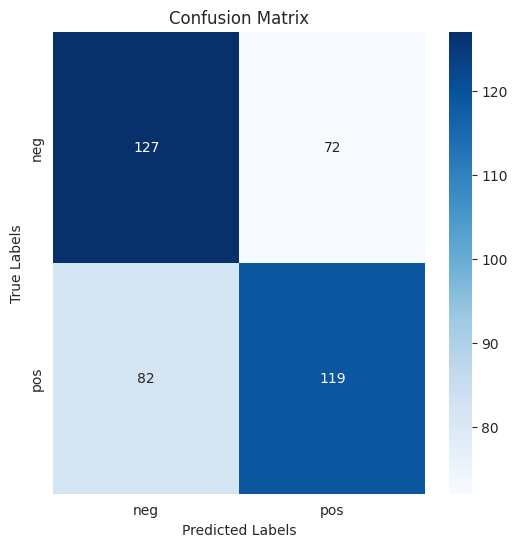



Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = Polynomial (p=3), Cost = 0.1
Accuracy: 60.25
[[188  11]
 [148  53]]


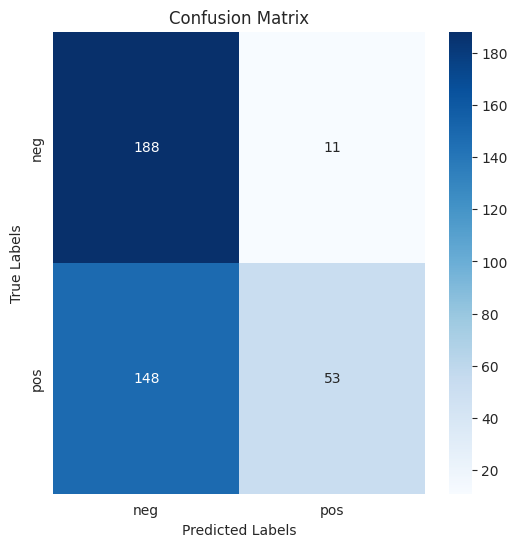



Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = RBF, Cost = 100
Accuracy: 60.25
[[124  75]
 [ 84 117]]


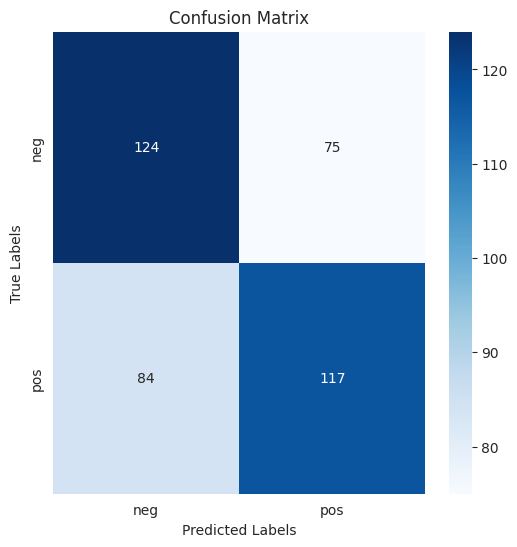

In [84]:
print("For Data Frame 2")
for df2_svm_model, df2_svm_cm in df1_model_dict.items():
  print("\nBelow is The Accuracy and confusion matrix of SVM MODEL with:",df2_svm_model)
  df2_svm_acc = ((df2_svm_cm[0][0] + df2_svm_cm[1][1]) / sum(sum(df2_svm_cm)))
  print('Accuracy:', df2_svm_acc*100)
  print(df2_svm_cm)

  # Evaluate the accuracy of the model
  #accuracy = accuracy_score(df1_test_label, df1_dt_y_pred)
  #print('Accuracy of Label:', accuracy)

  # Visualize confusion matrix with heatmap
  plt.figure(figsize=(6,6))
  plt.title('Confusion Matrix')
  sns.heatmap(df2_svm_cm, annot=True, cmap='Blues',fmt='d', xticklabels=sentiment_labels, 
                      yticklabels=sentiment_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()
  print()

####For third dataframe - 30features dataframe

In [85]:
# Print results for SVMs with 30features dataframe
print("Results for SVMs with 30features dataframe:")
df3_model_dict = train_svms(df_30features, df3_train_data, df3_test_data, df3_train_label, df3_test_label)

Results for SVMs with 30features dataframe:


Confusion Matrix

For Data Frame 3

Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = Linear, Cost = 1
Accuracy: 61.5
[[127  72]
 [ 82 119]]


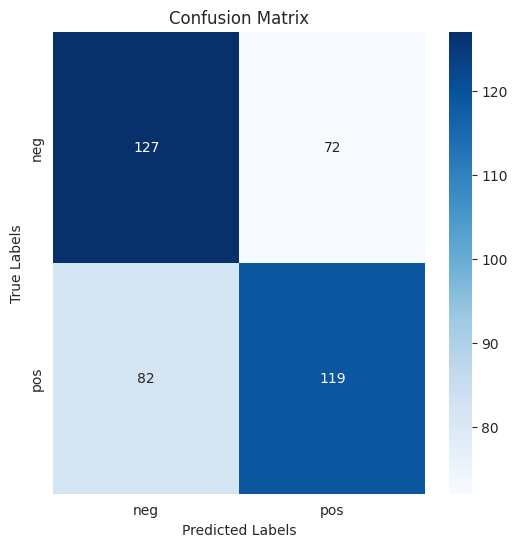



Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = Polynomial (p=3), Cost = 0.1
Accuracy: 60.25
[[188  11]
 [148  53]]


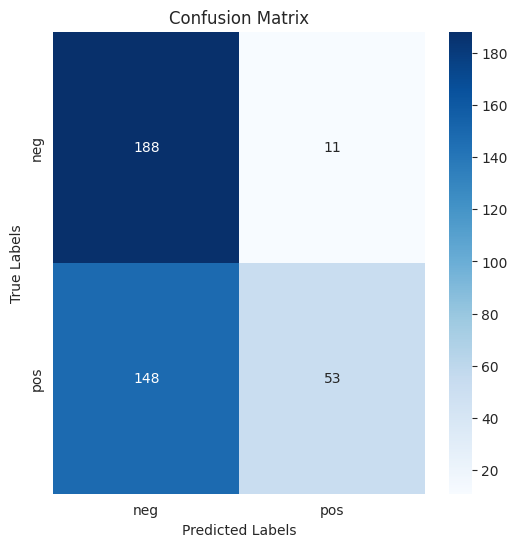



Below is The Accuracy and confusion matrix of SVM MODEL with: Kernel = RBF, Cost = 100
Accuracy: 60.25
[[124  75]
 [ 84 117]]


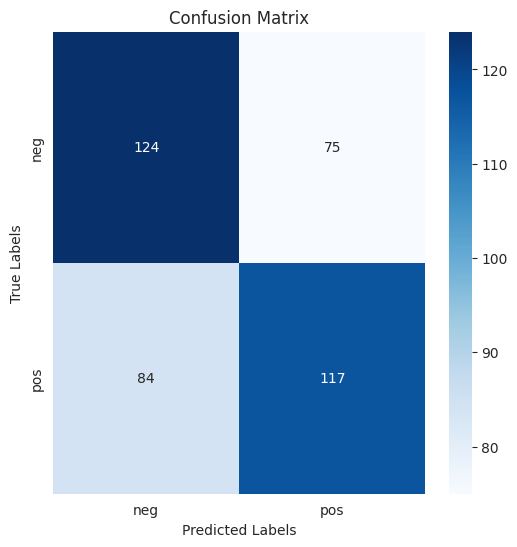

In [86]:
print("For Data Frame 3")
for df3_svm_model, df3_svm_cm in df1_model_dict.items():
  print("\nBelow is The Accuracy and confusion matrix of SVM MODEL with:",df3_svm_model)
  df3_svm_acc = ((df3_svm_cm[0][0] + df3_svm_cm[1][1]) / sum(sum(df3_svm_cm)))
  print('Accuracy:', df3_svm_acc*100)
  print(df3_svm_cm)

  # Evaluate the accuracy of the model
  #accuracy = accuracy_score(df1_test_label, df1_dt_y_pred)
  #print('Accuracy of Label:', accuracy)

  # Visualize confusion matrix with heatmap
  plt.figure(figsize=(6,6))
  plt.title('Confusion Matrix')
  sns.heatmap(df3_svm_cm, annot=True, cmap='Blues',fmt='d', xticklabels=sentiment_labels, 
                      yticklabels=sentiment_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()
  print()

## Part 7: Conclusions

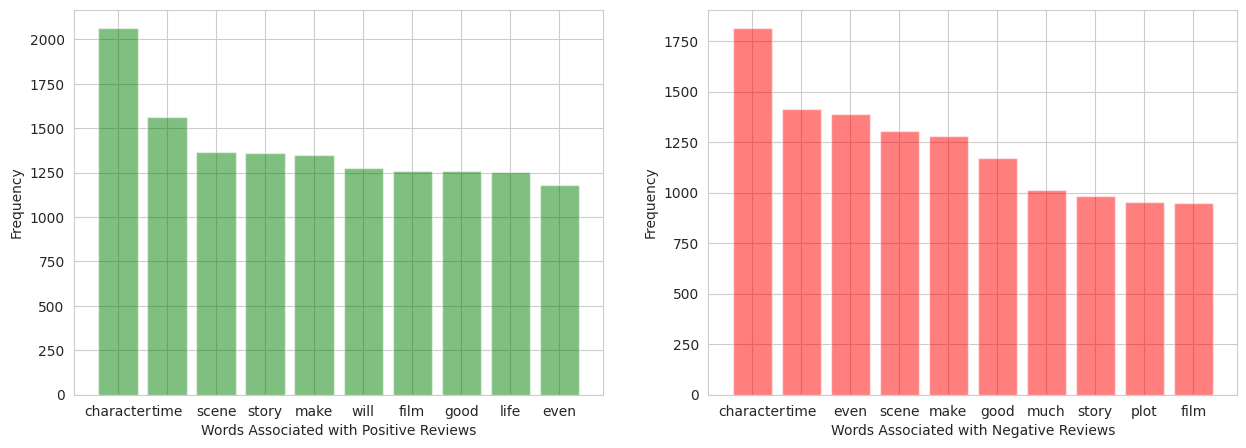

In [95]:
# Separate positive and negative reviews
positive_sentiment = lemmatized_df[lemmatized_df['Reviewclass'] == 'pos']
negative_sentiment = lemmatized_df[lemmatized_df['Reviewclass'] == 'neg']


# Get the top 10 positive and negative words
positive_words = Counter(' '.join(positive_sentiment['Text']).split()).most_common(10)
negative_words = Counter(' '.join(negative_sentiment['Text']).split()).most_common(10)

# Create two subplots for positive and negative words
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Plot positive words
ax1.bar([x[0] for x in positive_words], [x[1] for x in positive_words], color='green', alpha=0.5)
ax1.set_xlabel('Words Associated with Positive Reviews')
ax1.set_ylabel('Frequency')

# Plot negative words
ax2.bar([x[0] for x in negative_words], [x[1] for x in negative_words], color='red', alpha=0.5)
ax2.set_xlabel('Words Associated with Negative Reviews')
ax2.set_ylabel('Frequency')

plt.show()

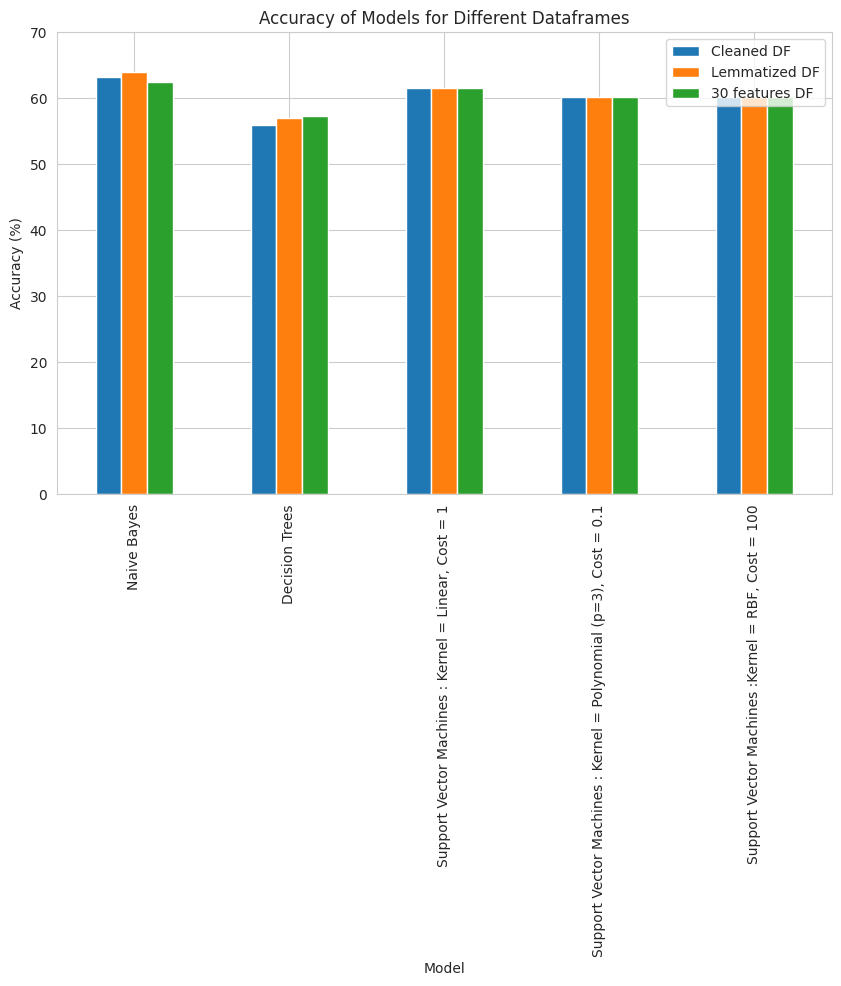

In [89]:
data = {'Cleaned DF': [63.25,56.00,61.5,60.25,60.25],
        'Lemmatized DF': [64.00, 57.00, 61.5, 60.25, 60.25],
        '30 features DF': [62.5, 57.25, 61.5, 60.25, 60.25]}

accuracy_df = pd.DataFrame(data, index=['Naive Bayes', 'Decision Trees', 'Support Vector Machines : Kernel = Linear, Cost = 1', 'Support Vector Machines : Kernel = Polynomial (p=3), Cost = 0.1', 'Support Vector Machines :Kernel = RBF, Cost = 100'])

ax = accuracy_df.plot(kind='bar', figsize=(10,6), rot=90)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy of Models for Different Dataframes')
plt.ylim(0, 70)
plt.show()
